In [ ]:
"""
Purpose: To look at the initial stats of the 
graph from autoproofreading


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from os import sys
sys.path.append("/meshAfterParty/meshAfterParty")
sys.path.append("/meshAfterParty/meshAfterParty/graph/")

In [6]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-02-26 04:19:29,433 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-02-26 04:19:29,435 - settings - Setting database.user to celiib
INFO - 2021-02-26 04:19:29,436 - settings - Setting database.password to newceliipass
INFO - 2021-02-26 04:19:29,441 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-02-26 04:19:29,442 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:19:29,460 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-02-26 04:19:29,886 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:19:29,920 - settings - Setting enable_python_native_blobs to True
INFO - 2021-02-26 04:19:30,365 - settings - Setting enable_python_native_blobs to True


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import networkx_utils as xu

# Getting the Statistics on the Initial Graph

In [8]:
orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")

In [9]:
original_edges = np.vstack([orig_presyn,orig_postsyn]).T
original_edges

array([[864691136056368856, 864691135462260637],
       [864691135593498923, 864691136723541757],
       [864691136951642335, 864691136816114148],
       ...,
       [864691135341031877, 864691136784133998],
       [864691136286708675, 864691135065040964],
       [864691135497618195, 864691135065040964]])

In [10]:
orig_G = nx.MultiDiGraph()
orig_G.add_edges_from(original_edges)
print(len(orig_G.nodes()),len(orig_G.edges()))

G_undirected_orig = nx.Graph(orig_G)
print(len(G_undirected_orig.nodes()),len(G_undirected_orig.edges()))

91565 17133898
91565 11482430


In [11]:
degree_distribution = np.array(xu.get_node_degree(orig_G,list(orig_G.nodes())))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [12]:
np.mean(degree_distribution_filtered),np.median(degree_distribution_filtered)

(339.1879109179317, 201.0)

In [13]:
print("hi")

hi


In [14]:
#For connected components cannot be a directed graph


# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected_orig))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

conn_comp_size = [91235, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2, 3, 3, 4, 2, 2, 2, 4, 2, 3, 2, 9, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 7, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


# Pull Down and Calculating the Initial Graph

In [17]:
synapse_table = du.proofreading_synapse_table()
synapse_table

synapse_id synapse index within the segmentation,synapse_type,ver the version number of the materializaiton,segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
515874,postsyn,30.00,864691136723541757,0,33721,36.95
519136,postsyn,30.00,864691136816114148,0,26870,39.08
519451,presyn,30.00,864691135986920451,0,23417,24.7
519451,postsyn,30.00,864691135393987573,0,64263,76.29
520250,postsyn,30.00,864691136816114148,0,26870,25.21
526715,postsyn,30.00,864691136056321496,0,36422,64.44
528615,postsyn,30.00,864691135873643918,0,36372,271.25
533040,postsyn,30.00,864691135776658528,0,4078,-1.0
535902,postsyn,30.00,864691135385316693,0,30104,0.76
536477,postsyn,30.00,864691135122295079,0,29845,7.63


In [18]:
synapse_data = minnie.SynapseProofread.fetch(as_dict=True)
synapse_data_df = pd.DataFrame.from_dict(synapse_data)
synapse_data_df

,synapse_id,synapse_type,segment_id,split_index,nucleus_id
0,510699,presyn,864691136056368856,0,20041
1,515874,presyn,864691135593498923,0,36774
2,515874,postsyn,864691136723541757,0,33721
3,519136,postsyn,864691136816114148,0,26870
4,519451,presyn,864691135986920451,0,23417
...,...,...,...,...,...
17772698,513428356,presyn,864691135341031877,1,211904
17772699,513428356,postsyn,864691136784133998,0,178345
17772700,513428538,postsyn,864691136784133998,0,178345
17772701,513428606,presyn,864691136107995779,0,208461


In [19]:
uniq_synapse_ids,unique_synapse_indexes,inverse_indices,synapse_id_counts = np.unique(synapse_data_df["synapse_id"].to_numpy(),
                           return_index=True,
                           return_inverse=True,
                            return_counts=True)

In [20]:
direct_connection_synapse_idx = np.where(synapse_id_counts==2)[0]
direct_connection_synapse_mask = np.zeros(len(synapse_id_counts))
direct_connection_synapse_mask[direct_connection_synapse_idx] = 1
direct_connection_synapse_mask = direct_connection_synapse_mask.astype("bool")
row_filter = direct_connection_synapse_mask[inverse_indices]

direct_connections_df = synapse_data_df.iloc[row_filter]
direct_connections_df

,synapse_id,synapse_type,segment_id,split_index,nucleus_id
1,515874,presyn,864691135593498923,0,36774
2,515874,postsyn,864691136723541757,0,33721
4,519451,presyn,864691135986920451,0,23417
5,519451,postsyn,864691135393987573,0,64263
6,520250,presyn,864691135617800847,0,26786
...,...,...,...,...,...
17772685,513426689,postsyn,864691135865513861,0,375309
17772687,513426885,presyn,864691135468148050,0,375145
17772688,513426885,postsyn,864691135155573604,1,404872
17772698,513428356,presyn,864691135341031877,1,211904


In [21]:
# Combining the table's presyns and postsyns onto the same row

df_tables = []
for synapse_type in ["presyn","postsyn"]:
    direct_connections_df_init = direct_connections_df[direct_connections_df["synapse_type"]==synapse_type]
    
    direct_connections_df_init_sorted = direct_connections_df_init.sort_values(by=['synapse_id']).reset_index(drop=True)
    
    direct_connections_df_presyn = direct_connections_df_init_sorted[[k for k in direct_connections_df_init_sorted.columns if k != "synapse_type"] ]
    
    #column_mapper = dict([(k,f"{k}_{synapse_type}") if k != "synapse_id"  else (k,k) for k in direct_connections_df_presyn.columns])
    column_mapper = dict([(k,f"{synapse_type}_{k}") for k in direct_connections_df_presyn.columns])

    presyn_df = direct_connections_df_presyn.rename(columns=column_mapper)
    df_tables.append(presyn_df)
    
direct_conn_df = pd.concat(df_tables,axis=1)
direct_conn_df

,presyn_synapse_id,presyn_segment_id,presyn_split_index,presyn_nucleus_id,postsyn_synapse_id,postsyn_segment_id,postsyn_split_index,postsyn_nucleus_id
0,515874,864691135593498923,0,36774,515874,864691136723541757,0,33721
1,519451,864691135986920451,0,23417,519451,864691135393987573,0,64263
2,520250,864691135617800847,0,26786,520250,864691136816114148,0,26870
3,551038,864691135780780880,0,36322,551038,864691136740407644,0,29830
4,552718,864691136436395166,0,3819,552718,864691135952027427,0,26626
...,...,...,...,...,...,...,...,...
3546179,513420602,864691136039374590,0,0,513420602,864691136388772880,0,347229
3546180,513420684,864691136451103999,0,408558,513420684,864691135502073525,0,410822
3546181,513426689,864691135334475497,0,374861,513426689,864691135865513861,0,375309
3546182,513426885,864691135468148050,0,375145,513426885,864691135155573604,1,404872


In [22]:
edges_df = direct_conn_df[["presyn_nucleus_id","postsyn_nucleus_id"]]
connectome_edges = edges_df.to_numpy()
connectome_edges

array([[ 36774,  33721],
       [ 23417,  64263],
       [ 26786,  26870],
       ...,
       [374861, 375309],
       [375145, 404872],
       [211904, 178345]])

# Preliminary Look at the Graph

In [23]:
import networkx as nx

In [24]:
G = nx.MultiDiGraph()
G.add_edges_from(connectome_edges)
len(G.nodes()),len(G.edges())

(73273, 3546184)

In [25]:
G_undirected_non_multi = nx.Graph(G)
len(G_undirected_non_multi.nodes()),len(G_undirected_non_multi.edges())

(73273, 2605092)

In [26]:
G_directed_non_multi = nx.DiGraph(G)
len(G_directed_non_multi.nodes()),len(G_directed_non_multi.edges())

(73273, 2657571)

In [27]:
#For connected components cannot be a directed graph
G_undirected = G_undirected_non_multi

n_components = nx.number_connected_components(G_undirected)
print(f"Number of connected components = {n_components}")

# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

Number of connected components = 145
conn_comp_size = [72937, 3, 2, 4, 5, 3, 3, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 4, 2, 2, 2, 2, 2, 2, 5, 3, 2, 2, 2, 4, 2, 4, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(conn_comp_size)
ax.set_title("Number of Neurons in Connected Components")
ax.set_xlabel("Number of Neurons")
plt.show()

# Selecting the largest component

In [28]:
G_largest = G.subgraph(conn_comp[0])
node_names_largest_comp = np.array(G_largest.nodes())
node_names_largest_comp.shape

(72937,)

# Plotting the Degree Distribution

In [33]:
import graph_visualizations as gu

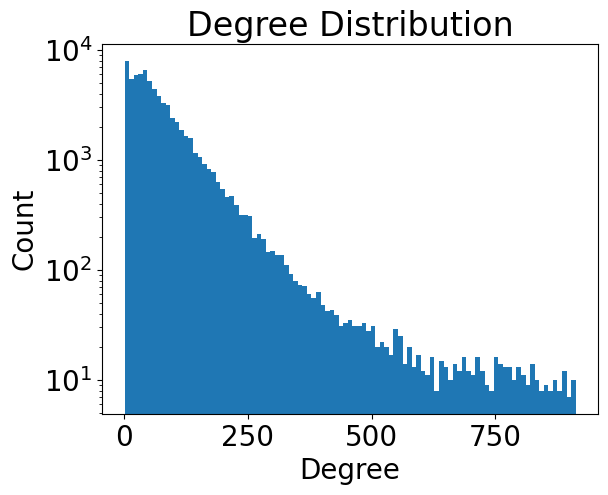

In [49]:
gu.plot_degree_distribution(G,logscale=True,n_bins = 100,percentile=99,
                           font_size=20)

In [64]:
minnie.AutoProofreadNeurons()

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version the version of code used for this cell typing classification,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),mesh_faces faces indices that were saved off as belonging to proofread neuron (external storage),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134219060901,0,0.25,30.00,0,0,0,1,1,inhibitory,no_spined,0,0,73352,506.05,1,1,84299,173386,16102,11139,248,=BLOB=,11723,24809,0,0,0,0,1,0,0,None,0.0,nan

# Getting the statistics on the graph

In [56]:
large_axon_nuclei = (minnie.AutoProofreadNeurons2() & "axon_length>1000").fetch("nucleus_id")
large_axon_nuclei.shape
large_axon_subgraph = G.subgraph(large_axon_nuclei)


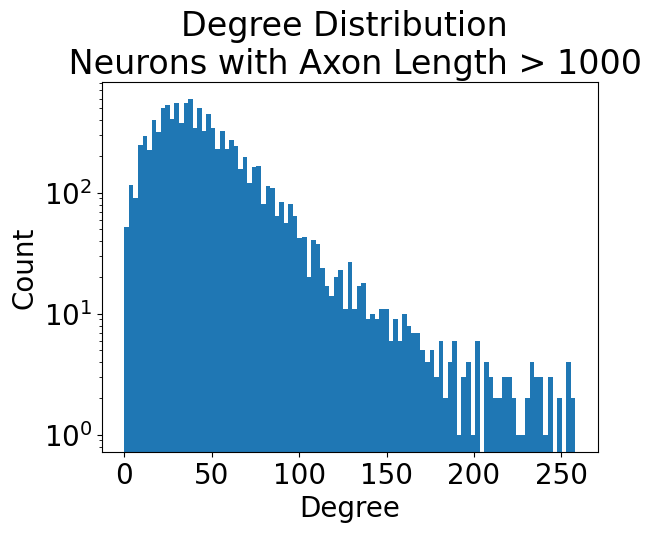

In [67]:
gu.plot_degree_distribution(large_axon_subgraph,logscale=True,n_bins = 100,percentile=99,
                           font_size=18,
                           title="Degree Distribution \n Neurons with Axon Length > 1000")

In [58]:
print(f"""
Graph Statistics:

Within the Direction Connection Graph
1) {len(G.nodes())} Nodes
2) {len(G.edges())} Direct Connections
3) {len(large_axon_subgraph.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")


Graph Statistics:

Within the Direction Connection Graph
1) 73273 Nodes
2) 3546183 Direct Connections
3) 10656 Nodes with Axon Skeletal Length > 1000
4) 270586 Direct Connections between Nodes with Axon Skeletal Length > 1000




In [62]:
excitatory_nuclei = (minnie.AutoProofreadNeurons2() & dict(spine_category = "densely_spined")).fetch("nucleus_id")
excitatory_nuclei
G_exc = G.subgraph(excitatory_nuclei)
large_axon_nuclei_exc =  (minnie.AutoProofreadNeurons2() & dict(spine_category = "densely_spined")
                                             & "axon_length>1000").fetch("nucleus_id")
large_axon_subgraph_exc = G.subgraph(large_axon_nuclei_exc)
                              

In [63]:
print(f"""
Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direct Connection Graph
1) {len(G_exc.nodes())} Nodes
2) {len(G_exc.edges())} Direct Connections
3) {len(large_axon_subgraph_exc.nodes())} Nodes with Axon Skeletal Length > 1000
4) {len(large_axon_subgraph_exc.edges())} Direct Connections between Nodes with Axon Skeletal Length > 1000

""")


Graph Statistics:

* For an all densely spined excitatory graph *
Within the Direction Connection Graph
1) 54588 Nodes
2) 1108263 Direct Connections
3) 9524 Nodes with Axon Skeletal Length > 1000
4) 174006 Direct Connections between Nodes with Axon Skeletal Length > 1000




In [ ]:
"""
Steps for Decomposition:

Preprocessing:
1) Auto Glia and Nuclei Removal

Decomposition:
1) Find Soma
2) Divide into Soma and Branches
3) Skeletonize All Branches
4) Create Concept Graphs of all Limbs
5) Automatic Spine Detection, Width calculation

Proofreading:
6) Split Multi-Nuclei Cells
7) Axon and Apical Identification
8) Excitatory/Inhibitory Classification
9) E/I based mesh filtering away
10) Synapse Filtering based on mesh filtering away




"""

# Degree Distribution

In [29]:
undirectional_graph = nx.Graph(G_largest)
no_selflooped_graph = xu.remove_selfloops(undirectional_graph)
no_selflooped_graph

In [30]:
degree_distribution = np.array(xu.get_node_degree(no_selflooped_graph,node_names_largest_comp))
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

In [31]:
print(f"Average Degree of Node: {np.mean(degree_distribution_filtered)}")
print(f"Median Degree of Node: {np.median(degree_distribution_filtered)}")

Average Degree of Node: 65.70743537452461
Median Degree of Node: 45.0


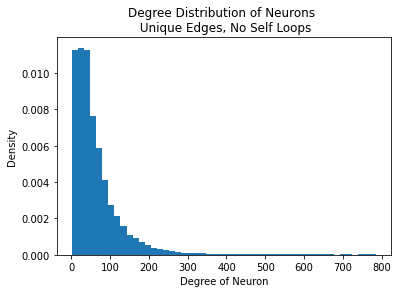

In [32]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=True)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Density")
plt.show()

# Degree Distribution In and Out

In [ ]:
np.sum(degree_distribution(G,degree_type="in")),np.sum(degree_distribution(G,degree_type="out"))

In [ ]:
np.sum(degree_distribution(G,degree_type="in_and_out"))

In [ ]:
import graph_analysis as ga
import graph_visualizations as gviz

In [ ]:
from importlib import reload
gviz = reload(gviz)

In [ ]:
in_degree = np.array(list(dict(G.in_degree()).values()))
in_degree

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_utils as mu

import numpy as np

mu.histogram(in_degree,bin_max = 700,
         bin_width = 10,return_fig_ax=True,logscale=True)

In [ ]:
ga.degree_distribution(G,
                                                       degree_type="in",
                                                       percentile=95)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                             percentile=100,
                              bin_width = 10,
                              bin_max = 600,
                             )

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="out",
                         bin_width=5,
                         bin_max = 800,
                        percentile=99)

In [ ]:
gviz.plot_degree_distribution(G,degree_type="in",title="In-Degree Distribution",
                         bin_width=5,
                         bin_max = 500,
                        percentile=99)

In [ ]:
plot_degree_distribution(G,degree_type="out",title="Out-Degree Distribution",
                        percentile=99)

In [ ]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=False)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Count")
ax.set_yscale("log")
plt.show()

# Getting the Soma to Soma Distance

In [ ]:
"""
Psuedoode: Pull down the Nucleus IDs and Nucleus Centers

1) Get the nucleus ids and centers
2) Adjust the centers for nm


"""

nuc_table = du.configure_nucleus_table() & "segment_id>0"
nuc_table

In [ ]:
nucleu_ids,nuc_x,nuc_y,nuc_z = nuc_table.fetch("nucleus_id","nucleus_x","nucleus_y","nucleus_z")

In [ ]:
nucleus_centers = np.vstack([nuc_x,nuc_y,nuc_z]).T * [4,4,40]
nucleus_centers

In [ ]:
nuc_id_to_center = dict([(k,v) for k,v in zip(nucleu_ids,nucleus_centers)])

In [ ]:
len(G_undirected_non_multi.edges())

In [ ]:
print("hi")

In [ ]:
import matplotlib.pyplot as plt
def graph_to_soma_to_soma_distance(G):
    total_unique_edges = np.array(list(G.edges()))
    edges_mask = np.all(total_unique_edges>0,axis=1)
    soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
    soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)

    
    fig,ax = plt.subplots(1,1)
    ax.hist(soma_distances_norm/1000,bins=100,density=False)
    ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
    ax.set_xlabel("Soma to Soma Distance (um)")
    ax.set_ylabel("Counts")
    plt.yscale("log")
    plt.xscale("linear")
    plt.show()

graph_to_soma_to_soma_distance(G)

In [ ]:
graph_to_soma_to_soma_distance(G_undirected_non_multi)

In [ ]:
total_unique_edges = np.array(list(G_undirected_non_multi.edges()))


In [ ]:
edges_mask = np.all(total_unique_edges>0,axis=1)
edges_mask

In [ ]:
soma_distances = np.array([[nuc_id_to_center[k],nuc_id_to_center[v]] for k,v in total_unique_edges[edges_mask]])
soma_distances

In [ ]:
soma_distances.shape

In [ ]:
soma_distances_norm = np.linalg.norm(soma_distances[:,0,:] - soma_distances[:,1,:],axis=1)
soma_distances_norm.shape

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(soma_distances_norm/1000,bins=100,density=False)
ax.set_title("Soma to Soma Distance of Unique Direct Connections \n After Auto Proofreading")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")
plt.yscale("log")
plt.xscale("linear")
plt.show()

In [ ]:
alpha_level = 0.7

import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.hist(total_distances_no_self_loops/1000,bins=100,density=False,color="blue",label="Before Auto Proofreading",alpha=alpha_level)
ax.hist(total_distances_no_self_loops_auto/1000,bins=100,density=False,color="red",label="After Auto Proofreading",alpha=alpha_level)
ax.set_title("Soma to Soma Distance of Direct Connections")
ax.set_xlabel("Soma to Soma Distance (um)")
ax.set_ylabel("Counts")

ax.set_yscale("log")
ax.set_xscale("linear")
ax.legend()
plt.show()